In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_excel("./LaDeptHealth/LA_COVID_TESTBYDAY_PARISH_PUBLICUSE.xlsx")
df.head()

,Lab Collection Date,Parish,Daily Test Count,Daily Negative Test Count,Daily Positive Test Count,Daily Case Count,datetime
0,2020-03-01,Acadia,0,0,0,0,2020-03-01 12:00:00
1,2020-03-02,Acadia,0,0,0,0,2020-03-02 12:00:00
2,2020-03-03,Acadia,0,0,0,0,2020-03-03 12:00:00
3,2020-03-04,Acadia,0,0,0,0,2020-03-04 12:00:00
4,2020-03-05,Acadia,0,0,0,0,2020-03-05 12:00:00


In [3]:
parishes = sorted(df['Parish'].unique())
print(parishes)

['Acadia', 'Allen', 'Ascension', 'Assumption', 'Avoyelles', 'Beauregard', 'Bienville', 'Bossier', 'Caddo', 'Calcasieu', 'Caldwell', 'Cameron', 'Catahoula', 'Claiborne', 'Concordia', 'DeSoto', 'East Baton Rouge', 'East Carroll', 'East Feliciana', 'Evangeline', 'Franklin', 'Grant', 'Iberia', 'Iberville', 'Jackson', 'Jefferson', 'Jefferson Davis', 'LaSalle', 'Lafayette', 'Lafourche', 'Lincoln', 'Livingston', 'Madison', 'Morehouse', 'Natchitoches', 'Orleans', 'Ouachita', 'Plaquemines', 'Pointe Coupee', 'Rapides', 'Red River', 'Richland', 'Sabine', 'St. Bernard', 'St. Charles', 'St. Helena', 'St. James', 'St. John the Baptist', 'St. Landry', 'St. Martin', 'St. Mary', 'St. Tammany', 'Tangipahoa', 'Tensas', 'Terrebonne', 'Union', 'Vermilion', 'Vernon', 'Washington', 'Webster', 'West Baton Rouge', 'West Carroll', 'West Feliciana', 'Winn']


In [4]:
mindate = df['Lab Collection Date'].min()
print(mindate)

2020-03-01 00:00:00


In [5]:
maxdate = df['Lab Collection Date'].max()
print(maxdate)

2020-09-23 00:00:00


In [65]:
columns = []
dates_raw = np.sort(df['Lab Collection Date'].unique())

dates = sorted(np.datetime_as_string( dates_raw, unit='D'))
for date in dates_raw:
    columns.append(date)

rows_cases = []
rows_tests = []

for parish in parishes:
    parish_mask = df['Parish'] == parish
    
    casecount = []
    testcount = []
        
    for date in dates_raw:
        
        data = df[np.logical_and( parish_mask,  df['Lab Collection Date']==date)]
        casecount.append(data['Daily Case Count'].iloc[0])
        testcount.append(data['Daily Test Count'].iloc[0])
        
    outdata_cases = []
    outdata_tests = []
    for idx in range(dates_raw.shape[0]):

        outdata_cases.append(casecount[idx])
        outdata_tests.append(testcount[idx])

    
    assert len(outdata_cases) == len(columns), "Outdata_cases len=%d, but columns len=%d" % (len(outdata),len(columns))
    assert len(outdata_tests) == len(columns), "Outdata_tests len=%d, but columns len=%d" % (len(outdata),len(columns))
    rows_cases.append(outdata_cases)
    rows_tests.append(outdata_tests)
    
    outdata_cases = []
    outdata_tests = []

    
for date in dates_raw:
    outdata_cases.append(df_parish_cases[date].sum())
    outdata_tests.append(df_parish_tests[date].sum())

rows_cases.append(outdata_cases)
rows_tests.append(outdata_tests)

    
df_parish_cases = pd.DataFrame(rows_cases, columns=columns, index=parishes + ['Louisiana'])
df_parish_tests = pd.DataFrame(rows_tests, columns=columns, index=parishes + ['Louisiana'])

    

In [71]:
df_parish_cases.index.unique()

Index(['Acadia', 'Allen', 'Ascension', 'Assumption', 'Avoyelles', 'Beauregard',
       'Bienville', 'Bossier', 'Caddo', 'Calcasieu', 'Caldwell', 'Cameron',
       'Catahoula', 'Claiborne', 'Concordia', 'DeSoto', 'East Baton Rouge',
       'East Carroll', 'East Feliciana', 'Evangeline', 'Franklin', 'Grant',
       'Iberia', 'Iberville', 'Jackson', 'Jefferson', 'Jefferson Davis',
       'LaSalle', 'Lafayette', 'Lafourche', 'Lincoln', 'Livingston', 'Madison',
       'Morehouse', 'Natchitoches', 'Orleans', 'Ouachita', 'Plaquemines',
       'Pointe Coupee', 'Rapides', 'Red River', 'Richland', 'Sabine',
       'St. Bernard', 'St. Charles', 'St. Helena', 'St. James',
       'St. John the Baptist', 'St. Landry', 'St. Martin', 'St. Mary',
       'St. Tammany', 'Tangipahoa', 'Tensas', 'Terrebonne', 'Union',
       'Vermilion', 'Vernon', 'Washington', 'Webster', 'West Baton Rouge',
       'West Carroll', 'West Feliciana', 'Winn', 'Louisiana'],
      dtype='object')

In [8]:
df_parish_tests.head()

,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23
Acadia,0,0,0,0,0,0,0,0,0,0,...,320,168,179,119,128,84,195,305,153,151
Allen,0,0,0,0,0,0,0,0,0,0,...,183,129,51,54,30,4,14,166,130,57
Ascension,1,0,1,0,0,0,1,0,1,0,...,420,246,252,389,210,68,56,336,248,197
Assumption,0,0,0,0,0,0,0,0,0,0,...,69,115,49,96,67,15,14,41,167,24
Avoyelles,0,0,0,0,0,0,0,0,0,0,...,413,192,91,205,117,17,55,443,222,49


In [70]:
df_population = pd.read_csv("./uscensus/co-est2019-alldata.csv" ,encoding='latin1')
df_population = df_population[df_population['STNAME'] == 'Louisiana']
df_population.index = df_population['CTYNAME'].str.replace(" Parish","")
orleans_population = df_population.loc['Orleans']['POPESTIMATE2019']
la_population = df_population.loc['Louisiana']['POPESTIMATE2019']

390144 4648794


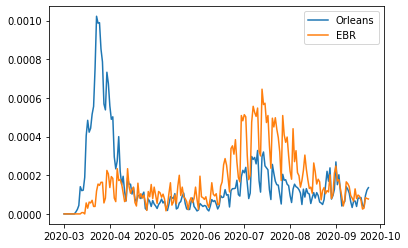

In [78]:
plt.plot(df_parish_cases.loc['Orleans']/orleans_population, label="Orleans")
plt.plot(df_parish_cases.loc['East Baton Rouge']/df_population.loc['East Baton Rouge']['POPESTIMATE2019'], label="EBR")
#plt.plot(df_parish_cases.loc['Louisiana']/la_population, label="Louisiana" )
plt.legend()


4648794